## <span style="color:green"> Esercizio 11.2 </span>

Cerco di fittare $f(x,y) = \sin(x^2+y^2)$ nel range $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

Poichè abbiamo una funzione bidimensionale che quindi sarà più difficile da fittare, aumento il numero di parametri del modello, aumentando il numero di parametri del secondo layer. Mantengo comunque il numero totale di layers.

In [169]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(50, input_shape=(2,),activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 50)                150       
                                                                 
 dense_167 (Dense)           (None, 30)                1530      
                                                                 
 dense_168 (Dense)           (None, 5)                 155       
                                                                 
 dense_169 (Dense)           (None, 5)                 30        
                                                                 
 dense_170 (Dense)           (None, 5)                 30        
                                                                 
 dense_171 (Dense)           (None, 1)                 6         
                                                                 
Total params: 1,901
Trainable params: 1,901
Non-train

Uso $10^4$ punti per il training e 500 per la validazione. Ho aumentato il numero di punti del training per far fronte alla maggiore difficoltà del problema. Questo mi permette anche di rendere il calcolo più veloce diminuendo le epoche.

In [170]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-3/2, 3/2, (10000,2))
x_valid = np.random.uniform(-3/2, 3/2, (500,2))
x_valid.sort()
y_target = []
for value in x_valid:
    y_target.append(np.sin(value[0]**2 + value[1]**2)) # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = []
for value in x_train:
    y_train.append(np.random.normal(np.sin(value[0]**2 + value[1]**2),sigma))
    
y_valid = []
for value in x_valid:
    y_valid.append(np.random.normal(np.sin(value[0]**2 + value[1]**2),sigma))
    
y_target=np.array(y_target)
y_valid = np.array(y_valid)
y_train = np.array(y_train)

#print training dataset
#import matplotlib.pyplot as plt
#plt.plot(x_valid, y_target, label='target')
#plt.scatter(x_valid, y_valid, color='r', label='validation data')
#plt.legend()
#plt.grid(True)
#plt.show()

Osservando i grafici della loss sotto si può vedere che 50 epoche siano più che sufficienti per far sì che essa converga. Per diminuirla ulteriormente sarebbe necessario modificare il modello.

In [171]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
313/313 [==============================] - 0s 958us/step - loss: 0.1603 - mse: 0.1603 - val_loss: 0.1473 - val_mse: 0.1473
Epoch 2/50
313/313 [==============================] - 0s 755us/step - loss: 0.1429 - mse: 0.1429 - val_loss: 0.1368 - val_mse: 0.1368
Epoch 3/50
313/313 [==============================] - 0s 787us/step - loss: 0.1354 - mse: 0.1354 - val_loss: 0.1300 - val_mse: 0.1300
Epoch 4/50
313/313 [==============================] - 0s 810us/step - loss: 0.1292 - mse: 0.1292 - val_loss: 0.1233 - val_mse: 0.1233
Epoch 5/50
313/313 [==============================] - 0s 874us/step - loss: 0.1226 - mse: 0.1226 - val_loss: 0.1164 - val_mse: 0.1164
Epoch 6/50
313/313 [==============================] - 0s 991us/step - loss: 0.1158 - mse: 0.1158 - val_loss: 0.1087 - val_mse: 0.1087
Epoch 7/50
313/313 [==============================] - 0s 814us/step - loss: 0.1091 - mse: 0.1091 - val_loss: 0.1010 - val_mse: 0.1010
Epoch 8/50
313/313 [==============================] - 0s 805us

In [172]:

score2 = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])


16/16 [==============================] - 0s 732us/step - loss: 0.0138 - mse: 0.0138

Test loss: 0.013760293833911419
Test accuracy: 0.013760293833911419


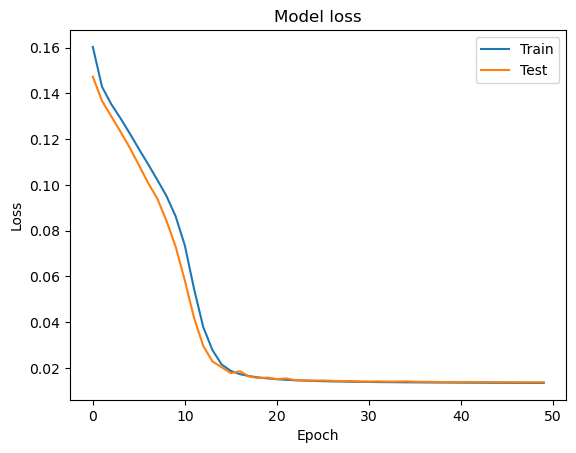

In [175]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Dal grafico finale possiamo vedere che l'accordo con la funzione esatta è buono. Rimangono alcuni problemi nelle zone più ai lati dell'intervallo preso in considerazione.

32/32 [==============================] - 0s 881us/step


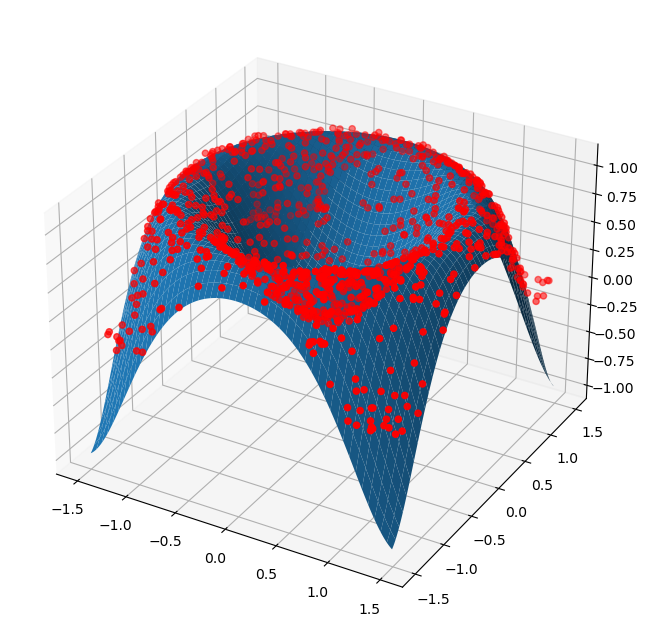

In [177]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()
x_predicted = np.random.uniform(-3/2, 3/2, (1000,2))
y_predicted = model.predict(x_predicted)
ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, color="r")

x = np.arange(-3/2, 3/2, 0.01)
y = np.arange(-3/2, 3/2, 0.01)

X, Y = np.meshgrid(x, y)
Z = np.sin(X**2 + Y**2)

ax.plot_surface(X, Y, Z)

plt.show()
